## STUDENTS' MENTAL HEALTH EFFECT ON CGPA
This data analysis is focused on drawing insight on how mental health issue affect student performance. It consist of observations, including depression, anxiety, panic, marital_status which are the major factors mentally affecting the students academic performance.

In [384]:
# import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [385]:
# import dataset
sh=pd.read_csv(r'C:\Users\PHOTON\Desktop\SIR PHOTON\KAGGLE\Studend mental health\smh.csv')

In [386]:
sh.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [387]:
sh.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [388]:
# view data properties
sh.shape

(101, 11)

## Data Preprocessing

In [389]:
# drop timestamp
sh=sh.drop('Timestamp', axis=1)

In [390]:
# Rename the columns with lesser name
c_name={'Choose your gender':'Gender', 'What is your course?':'Course', 'Your current year of Study':'Year', 'What is your CGPA?':'CGPA',
       'Do you have Depression?':'Depression', 'Do you have Anxiety?':'Anxiety', 'Do you have Panic attack?':'Panic', 'Did you seek any specialist for a treatment?':'Specialist_treatment'}

In [391]:
sh=sh.rename(c_name, axis=1)

In [392]:
sh.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [393]:
sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                101 non-null    object 
 1   Age                   100 non-null    float64
 2   Course                101 non-null    object 
 3   Year                  101 non-null    object 
 4   CGPA                  101 non-null    object 
 5   Marital status        101 non-null    object 
 6   Depression            101 non-null    object 
 7   Anxiety               101 non-null    object 
 8   Panic                 101 non-null    object 
 9   Specialist_treatment  101 non-null    object 
dtypes: float64(1), object(9)
memory usage: 8.0+ KB


In [394]:
# Check for missing data
sh.isna().sum()

Gender                  0
Age                     1
Course                  0
Year                    0
CGPA                    0
Marital status          0
Depression              0
Anxiety                 0
Panic                   0
Specialist_treatment    0
dtype: int64

In [395]:
# Row with missing age
sh[sh['Age'].isna()]

,Gender,Age,Course,Year,CGPA,Marital status,Depression,Anxiety,Panic,Specialist_treatment
43,Male,NaN,BIT,year 1,0 - 1.99,No,No,No,No,No


In [396]:
sh[(sh['Gender']=='Male') & (sh['Course']=='BIT')]['Age'].mean()

22.333333333333332

Since the mean age of BIT Male students is 22, the missing age is filled with 22.

In [397]:
sh['Age']=sh['Age'].fillna(22)

In [398]:
sh.isna().sum()

Gender                  0
Age                     0
Course                  0
Year                    0
CGPA                    0
Marital status          0
Depression              0
Anxiety                 0
Panic                   0
Specialist_treatment    0
dtype: int64

The 'NaN' in the dataset is cleared.

In [399]:
sh['Year']=sh['Year'].apply(lambda x:x.lower().strip('year '))

### EDA

Text(0.5, 1.0, 'Age distriution')

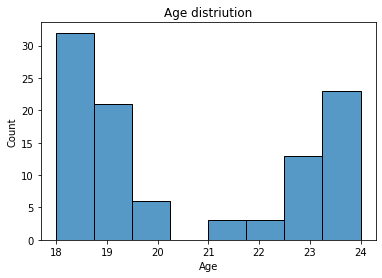

In [400]:
sns.histplot(x='Age', data=sh)
plt.title('Age distriution')

Text(0.5, 1.0, 'Age distriution based on gender')

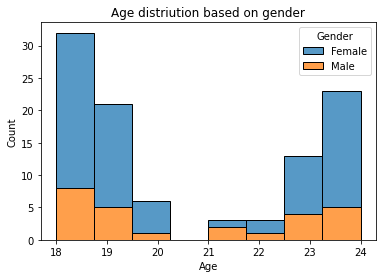

In [401]:
sns.histplot(x='Age', data=sh, hue='Gender', multiple='stack')
plt.title('Age distriution based on gender')

There are more female students than men.

<AxesSubplot:>

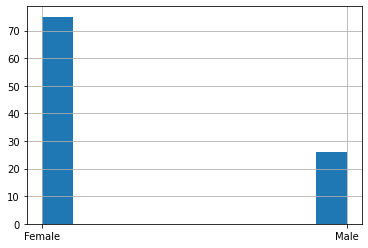

In [402]:
sh['Gender'].hist()

<AxesSubplot:xlabel='Specialist_treatment', ylabel='count'>

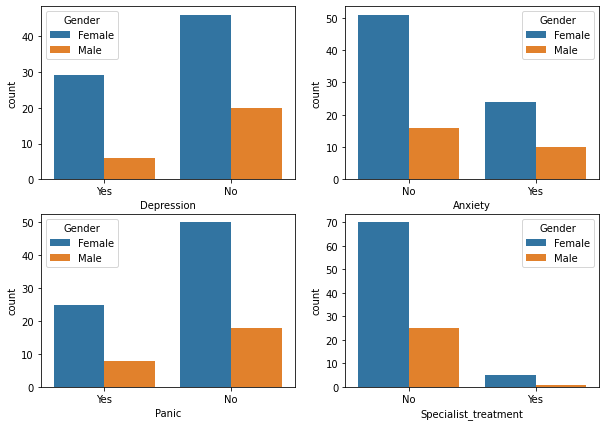

In [403]:
fig=plt.figure(figsize=(10,7))

plt.subplot(2,2,1)
sns.countplot(x='Depression',hue='Gender', data=sh)

plt.subplot(2,2,2)
sns.countplot(x='Anxiety', hue='Gender',data=sh)

plt.subplot(2,2,3)
sns.countplot(x='Panic',hue='Gender', data=sh)

plt.subplot(2,2,4)
sns.countplot(x='Specialist_treatment',hue='Gender', data=sh)

Most of those affected with mental health are females.

<Figure size 720x576 with 0 Axes>

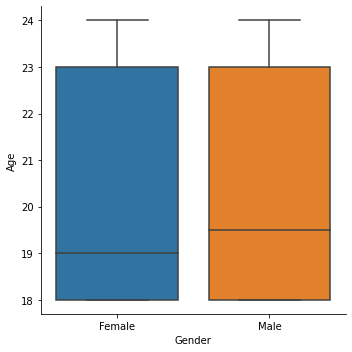

In [404]:
plt.figure(figsize=(10,8))
sns.catplot(x='Gender', y='Age', data=sh, kind='box')

In [405]:
# Course with highest respondents
sh['Course'][sh['Course'].value_counts().max()]

'BIT'

Most of the students are from BIT departmnet

In [406]:
# Course with the least respondents
sh['Course'][sh['Course'].value_counts().min()]

'Islamic education'

In [407]:
#Students who received special treatments
sh['Specialist_treatment'].value_counts()

No     95
Yes     6
Name: Specialist_treatment, dtype: int64

<AxesSubplot:xlabel='CGPA', ylabel='Count'>

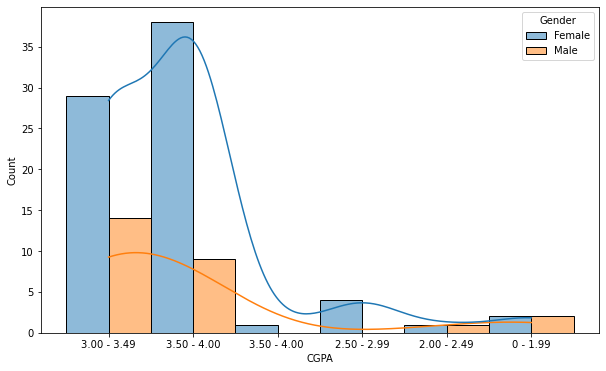

In [408]:
plt.figure(figsize=(10,6))
sns.histplot(x='CGPA', data=sh, hue='Gender', multiple='dodge', kde=True)

The CGPA distribution shows that female students mostly perform better than the male students.

<AxesSubplot:xlabel='Depression', ylabel='count'>

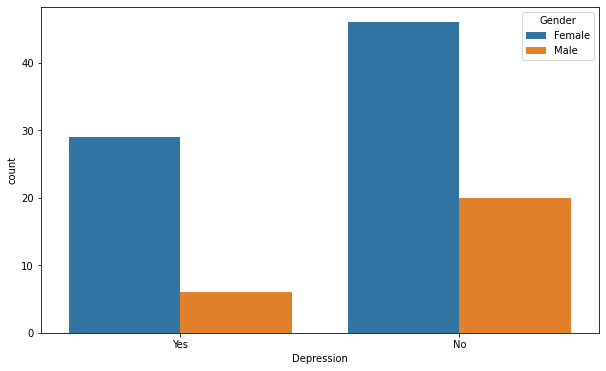

In [409]:
plt.figure(figsize=(10,6))
sns.countplot(x='Depression', data=sh, hue='Gender')

In [410]:
# Respondent with depression, anxiety and panic Attack
rdap=sh[(sh['Depression']=='Yes') & (sh['Anxiety']=='Yes') & (sh['Panic']=='Yes')]
rdap

,Gender,Age,Course,Year,CGPA,Marital status,Depression,Anxiety,Panic,Specialist_treatment
2,Male,19.0,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
17,Female,24.0,ENM,4,3.00 - 3.49,Yes,Yes,Yes,Yes,No
19,Female,18.0,Marine science,2,3.50 - 4.00,Yes,Yes,Yes,Yes,No
24,Female,23.0,BCS,3,3.50 - 4.00,No,Yes,Yes,Yes,No
28,Female,24.0,BIT,3,3.50 - 4.00,Yes,Yes,Yes,Yes,Yes
34,Female,19.0,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
37,Female,19.0,BIT,1,2.50 - 2.99,No,Yes,Yes,Yes,No
53,Female,20.0,koe,3,3.00 - 3.49,Yes,Yes,Yes,Yes,No
80,Female,24.0,Communication,2,3.50 - 4.00,Yes,Yes,Yes,Yes,No
87,Female,18.0,psychology,1,3.50 - 4.00,No,Yes,Yes,Yes,No


The above dataframe is a subset containing those significantly affected with mentalhealth, i.e 'Depression, Panic and Anxiety'.

In [411]:
# Married
rdap['Marital status'].value_counts()

No     5
Yes    5
Name: Marital status, dtype: int64

In [412]:
# Respondent with depression, anxiety or panic Attack
r=sh[(sh['Depression']=='Yes') | (sh['Anxiety']=='Yes') | (sh['Panic']=='Yes')]
r

,Gender,Age,Course,Year,CGPA,Marital status,Depression,Anxiety,Panic,Specialist_treatment
0,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,3,3.00 - 3.49,Yes,Yes,No,No,No
5,Male,19.0,Engineering,2,3.50 - 4.00,No,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...
93,Female,18.0,BENL,1,3.00 - 3.49,No,Yes,No,No,No
94,Female,24.0,Fiqh,3,0 - 1.99,No,No,No,Yes,No
96,Female,21.0,BCS,1,3.50 - 4.00,No,No,Yes,No,No
97,Male,18.0,Engineering,2,3.00 - 3.49,No,Yes,Yes,No,No


In [413]:
r.shape

(64, 10)

<AxesSubplot:xlabel='Gender', ylabel='count'>

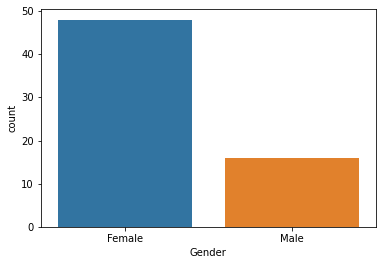

In [414]:
sns.countplot(x='Gender', data=r)

<AxesSubplot:xlabel='Age', ylabel='Count'>

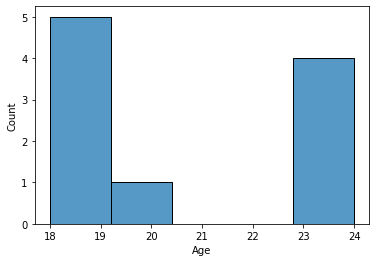

In [415]:
sns.histplot(x='Age', data=rdap)

In [416]:
# The students that undergo special treatment.
mas=sh[sh['Specialist_treatment']=='Yes']
mas

,Gender,Age,Course,Year,CGPA,Marital status,Depression,Anxiety,Panic,Specialist_treatment
28,Female,24.0,BIT,3,3.50 - 4.00,Yes,Yes,Yes,Yes,Yes
33,Male,18.0,BCS,2,3.50 - 4.00,Yes,Yes,Yes,No,Yes
39,Female,24.0,Engineering,2,2.50 - 2.99,Yes,Yes,No,Yes,Yes
50,Female,23.0,ALA,1,2.50 - 2.99,Yes,Yes,No,Yes,Yes
54,Female,19.0,BCS,1,3.50 - 4.00,No,Yes,No,Yes,Yes
85,Female,18.0,psychology,1,3.50 - 4.00,No,Yes,Yes,No,Yes


In [417]:
mas.shape

(6, 10)

<AxesSubplot:xlabel='CGPA', ylabel='Count'>

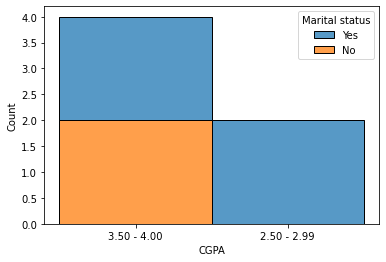

In [418]:
sns.histplot(x='CGPA', hue='Marital status', data=mas, multiple='stack')

Special treatment are not in relation with students performance. Most of the students consulting the specialists are at good CGPA range, in which some of them are even married. While non of them score below 2.5cgpa.  

## Modeling section

In [419]:
# Conversion into numerical values
#def conv(x):
#    for i in x:
#        if i=='Yes':
#            return 1
#        else:
 #           return 0
        
#col=['Marital status', 'Depression', 'Anxiety', 'Panic', 'Specialist_treatment']
#for e in col:
#    sh[e]=sh[e].apply(conv)

In [420]:
col=['Marital status', 'Depression', 'Anxiety', 'Panic', 'Specialist_treatment']
for e in col:
    sh[e]=sh[e].apply(lambda x:0 if x=='No' else 1)
    

sh['Gender']=sh['Gender'].apply(lambda x:1 if x=='Male' else 0)

In [421]:
sh.head()

,Gender,Age,Course,Year,CGPA,Marital status,Depression,Anxiety,Panic,Specialist_treatment
0,0,18.0,Engineering,1,3.00 - 3.49,0,1,0,1,0
1,1,21.0,Islamic education,2,3.00 - 3.49,0,0,1,0,0
2,1,19.0,BIT,1,3.00 - 3.49,0,1,1,1,0
3,0,22.0,Laws,3,3.00 - 3.49,1,1,0,0,0
4,1,23.0,Mathemathics,4,3.00 - 3.49,0,0,0,0,0


In [422]:
# Feature Engineering
#Observation features
x_feat= sh.drop(['CGPA', 'Course'], axis=1)
y_targ=sh['CGPA']

In [423]:
# Import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [424]:
x_train, x_test, y_train, y_test= train_test_split(x_feat, y_targ)

In [425]:
# Instantiate the model
rf=RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [426]:
# Prediction, testing the model with the test_set
pred=rf.predict(x_test)

In [428]:
#pred

In [429]:
# Model evaluation
from sklearn.metrics import confusion_matrix, classification_report

In [431]:
print(confusion_matrix(y_test, pred))

[[ 0  0  0  1  0]
 [ 0  0  1  1  0]
 [ 1  0  3  4  0]
 [ 0  0  2 12  0]
 [ 0  0  1  0  0]]


In [432]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    0 - 1.99       0.00      0.00      0.00         1
 2.50 - 2.99       0.00      0.00      0.00         2
 3.00 - 3.49       0.43      0.38      0.40         8
 3.50 - 4.00       0.67      0.86      0.75        14
3.50 - 4.00        0.00      0.00      0.00         1

    accuracy                           0.58        26
   macro avg       0.22      0.25      0.23        26
weighted avg       0.49      0.58      0.53        26



C:\Users\PHOTON\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PHOTON\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PHOTON\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [435]:
# Using support vector machine

from sklearn.svm import SVC

In [441]:
sv=SVC()

In [442]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

cf=make_pipeline(StandardScaler(), sv)

In [443]:
cf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [444]:
pred2=cf.predict(x_test)

In [445]:
pred2

array(['3.50 - 4.00', '3.50 - 4.00', '3.00 - 3.49', '3.00 - 3.49',
       '3.50 - 4.00', '3.50 - 4.00', '3.50 - 4.00', '3.50 - 4.00',
       '3.50 - 4.00', '3.50 - 4.00', '3.50 - 4.00', '3.00 - 3.49',
       '3.50 - 4.00', '3.50 - 4.00', '3.50 - 4.00', '3.50 - 4.00',
       '3.00 - 3.49', '3.00 - 3.49', '3.50 - 4.00', '3.00 - 3.49',
       '3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00', '3.00 - 3.49',
       '3.50 - 4.00', '3.00 - 3.49'], dtype=object)

In [446]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

    0 - 1.99       0.00      0.00      0.00         1
 2.50 - 2.99       0.00      0.00      0.00         2
 3.00 - 3.49       0.22      0.25      0.24         8
 3.50 - 4.00       0.53      0.64      0.58        14
3.50 - 4.00        0.00      0.00      0.00         1

    accuracy                           0.42        26
   macro avg       0.15      0.18      0.16        26
weighted avg       0.35      0.42      0.39        26



C:\Users\PHOTON\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PHOTON\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PHOTON\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [447]:
print(confusion_matrix(y_test, pred2))

[[0 0 0 1 0]
 [0 0 1 1 0]
 [0 0 2 6 0]
 [0 0 5 9 0]
 [0 0 1 0 0]]
